## Data analysis

In [314]:
from l_p2 import persistence_length
import matplotlib.pyplot as plt
import numpy as np
import scipy
import MDAnalysis as mda
from MDAnalysis.analysis import polymer
import glob
import pandas as pd
from scipy.stats import linregress
import os
from polymer_dictionary import polymer_dictionary

from pl_com import persistence_length1

ref_length = 0.3563594872561357

In [315]:
# Getting a sorted list of the 10mer trajectories
key_list = sorted(list(polymer_dictionary.keys())) # Aligning dictionary and path to aid automation
path = os.getcwd() # Non-user specific path
molecule_list = sorted(glob.glob(path+"/gsd_files/10_mers/"+"*_10mer.gsd"))

In [316]:
subfolders = [str(i) for i in range(100, 1200, 100)]
all_mol_list = []
all_mol_list.append(molecule_list)

for subfolder in subfolders:
    folder_path = os.path.join(path, "gsd_files", "10_mers", subfolder)
    molecules = sorted(glob.glob(os.path.join(folder_path, "*.gsd")))
    all_mol_list.append(molecules)


### Calculating persistence lengths:

In [318]:
p_lens = []
for mol_list in all_mol_list:
    i = 0
    for filepath in mol_list:
        h = persistence_length(filepath=filepath,
                           atom_index=polymer_dictionary.get(key_list[i]).get("Sulfur index"),
                           monomer_count=10,
                           start=50)
        l_p = h[0]
        l_b = h[1]
        x_values = h[2]
        C_n = h[3]
        exp_fit = h[4]
        decorr = h[-2]
        i += 1
        p_lens.append(l_p*ref_length*10)

In [319]:
start = 100
stop = 1200
step = 100

seeds = [12345] + [i for i in range(start, stop, step)]


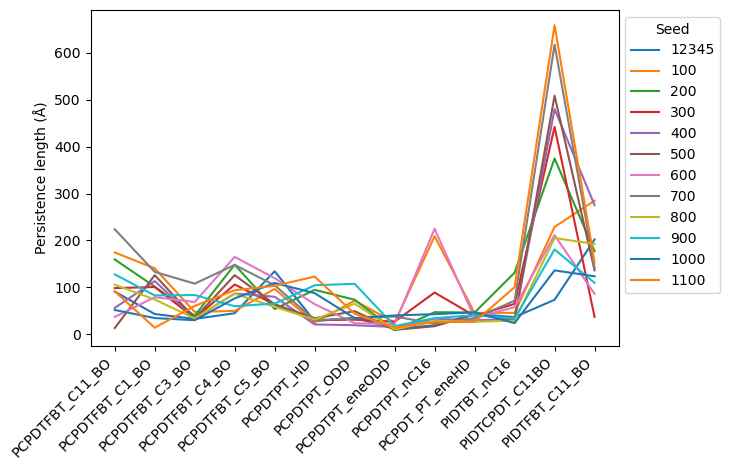

In [320]:
for i in range(len(seeds)):
    plt.plot(key_list,p_lens[i*13:(i+1)*13])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylabel("Persistence length (Å)")
plt.legend(seeds, title="Seed", loc="upper left", bbox_to_anchor=(1, 1))

## Plotting boxplots, independence p-values, and variance

### Boxplots

In [321]:
# Makes a list of each molecule
copy = []
for i in range(len(key_list)):
    copy.append(p_lens[i::13])

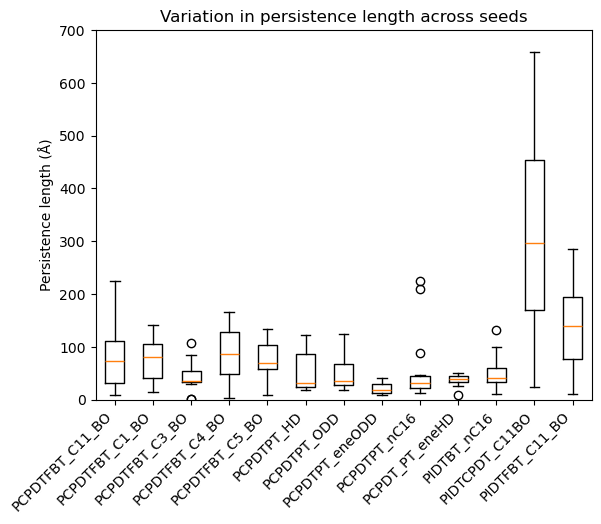

In [290]:
plt.boxplot(copy, tick_labels=key_list)
plt.ylim(0,700)
plt.xticks(rotation=45,ha='right')
plt.title("Variation in persistence length across seeds")
plt.ylabel("Persistence length (Å)")
plt.savefig("box_plots",bbox_inches='tight', dpi=600)
plt.show()

### Independence

In [291]:
from scipy.stats import chisquare, chi2_contingency

In [292]:
independence = []
for i in range(len(key_list)):
    chi2_statistic, p_value, dof, expected_frequencies = chi2_contingency(copy[i])
    independence.append(p_value)

In [293]:
x = list(range(len(independence))) 

Text(0, 0.5, 'P value')

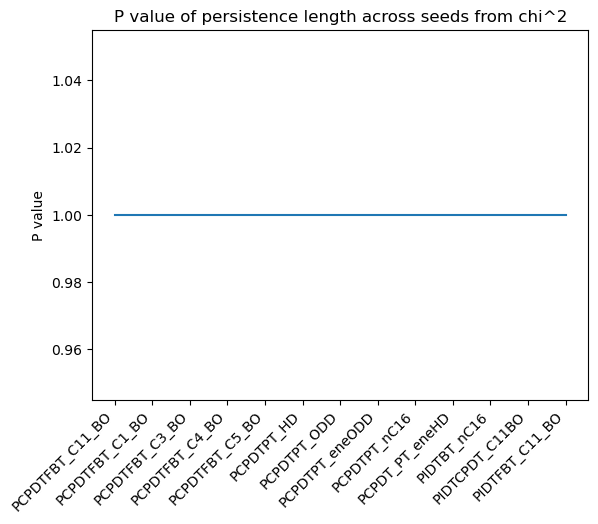

In [294]:
plt.plot(independence)
plt.xticks(ticks=x, labels=key_list, rotation=45,ha='right')
plt.title("P value of persistence length across seeds from chi^2")
plt.ylabel("P value")

### Mean persistence length measurement and standard deviation

In [322]:
x = list(range(len(key_list))) 

In [323]:
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [324]:
stdv = []
means = []
for i in range(len(key_list)):
    means.append(np.mean(copy[i]))
    stdv.append(np.std(copy[i], ddof=1))

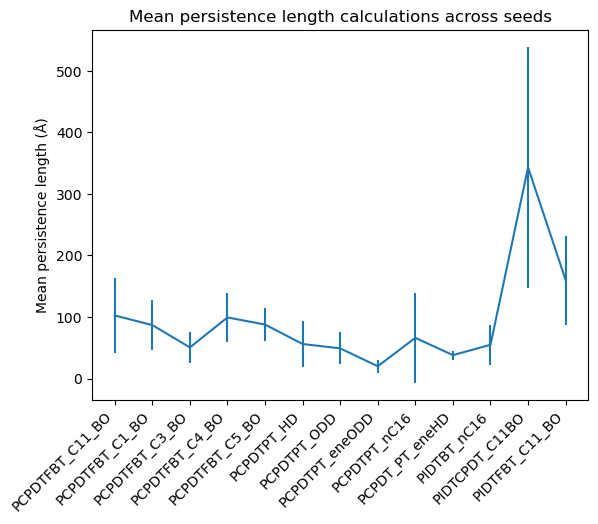

In [325]:
plt.errorbar(x=key_list,y=means,yerr=stdv)
plt.xticks(ticks=x, labels=key_list, rotation=45, ha='right')
plt.title("Mean persistence length calculations across seeds")
plt.ylabel("Mean persistence length (Å)")
# plt.ylim(0,300)
plt.show()

## Comparison against Danielsen et al. paper

In [327]:
measured_pl = [291, 67.0, 78.4, 86.4, 114, 47.3, 54.9, 83.4, 61.0, 76.6, 1310, 236, 254] # Measured persistence length using SANS (in alphabetical order)

In [328]:
differences = np.array(measured_pl) - np.array(means)

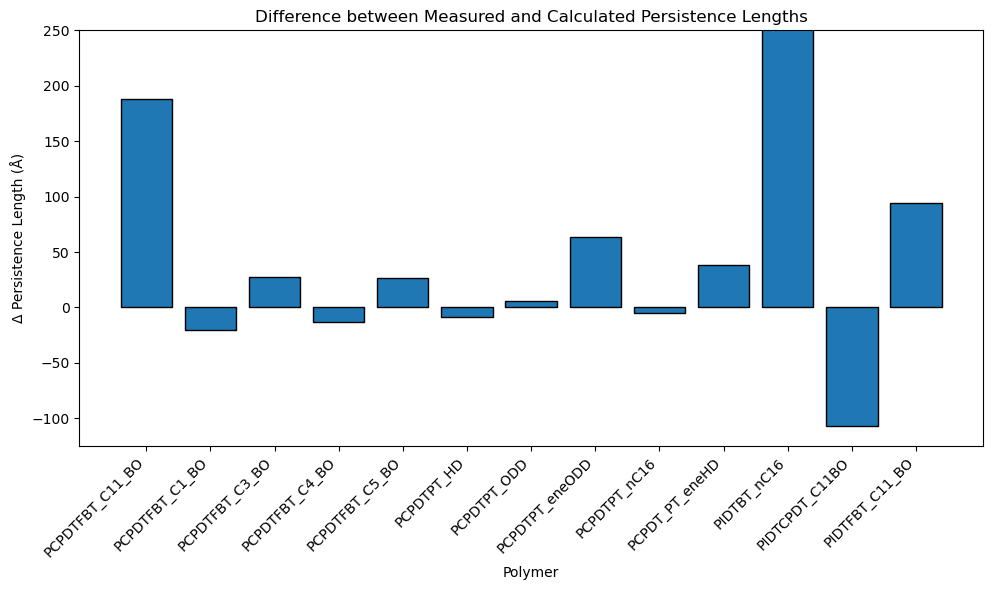

In [331]:
plt.figure(figsize=(10, 6))
plt.bar(key_list[0:len(molecule_list)], differences, edgecolor='black')

plt.xlabel('Polymer')
plt.ylabel('Δ Persistence Length (Å)')
plt.title('Difference between Measured and Calculated Persistence Lengths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(-125,250)
plt.savefig("bar_chart",bbox_inches='tight', dpi=600)
plt.show()

In [284]:
l_p, l_b, x, auto_avg, fit, exp_coeff, acorr, decor, unit_bonds = persistence_length(
    filepath="test1.gsd", 
    atom_index=1,        
    monomer_count=100,
    start=499
    # stop=1
)

49.23349838860037


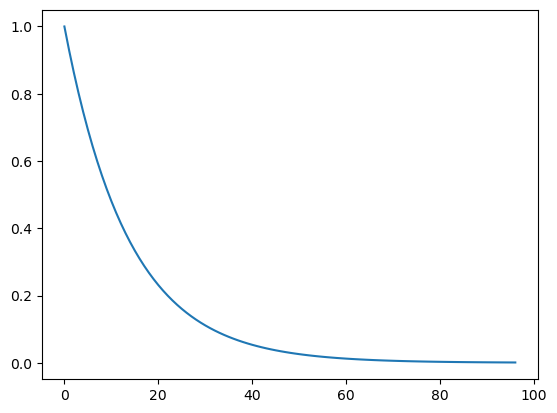

In [306]:
print(l_p*ref_length*10)
plt.plot(fit)

In [286]:
print(str((l_p*ref_length*10)*10**-10)+" m")

4.923349838860037e-09 m


In [308]:
print(key_list[11])

PIDTCPDT_C11BO


In [313]:
# print(max(copy[11]))
for i in range(len(key_list)):
    print(min(copy[i]))
    print(copy[i].index(min(copy[i])))
# print(copy[11].index(max(copy[11])))


7.799640633968853
13
13.463475107068543
13
1.6982025656601314
14
2.044850542282885
13
9.006449213546146
15
17.656175594664656
15
18.494452471195263
13
8.596631142961193
2
12.657372022831957
14
8.67535201542606
15
9.829253971799988
14
23.36114176928596
13
10.46207460390841
14


23.377407364093234


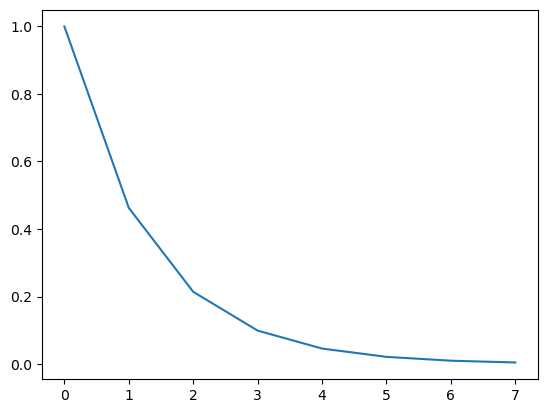

In [310]:
l_p, l_b, x, auto_avg, fit, exp_coeff, acorr, decor, unit_bonds = persistence_length(
    # filepath="/home/jbieri/CME_lab/repos/pl-validation/gsd_files/10_mers/PCPDTFBT_C3_BO_10mer.gsd", 
    filepath="/home/jbieri/CME_lab/repos/pl-validation/gsd_files/10_mers/1300/PIDTCPDT_C11BO_10mer_seed_1300.gsd",
    atom_index=1,        
    monomer_count=10,
    start=50
)
print(l_p*ref_length*10)
plt.plot(fit)

## Using center of mass of a monomer as input 

In [235]:
p_lens = []
for i in range(len(molecule_list)):
    h = persistence_length(filepath=molecule_list[i],
                       atom_index=polymer_dictionary.get(key_list[i]).get("Sulfur index"),
                       monomer_count=10,
                       start=99)
    l_p = h[0]
    l_b = h[1]
    x_values = h[2]
    C_n = h[3]
    exp_fit = h[4]
    decorr = h[-2]
    p_lens.append(l_p*ref_length*10)

data = {"Polymer": key_list[0:len(molecule_list)], "Persistence length (Å)": p_lens, "Measured length (Å)": measured_pl}
df = pd.DataFrame(data)
print(df)

            Polymer  Persistence length (Å)  Measured length (Å)
0   PCPDTFBT_C11_BO              114.693299                291.0
1    PCPDTFBT_C1_BO               55.078179                 67.0
2    PCPDTFBT_C3_BO                2.096881                 78.4
3    PCPDTFBT_C4_BO               14.251529                 86.4
4    PCPDTFBT_C5_BO              136.313857                114.0
5        PCPDTPT_HD              103.335107                 47.3
6       PCPDTPT_ODD               18.269853                 54.9
7    PCPDTPT_eneODD               10.291984                 83.4
8      PCPDTPT_nC16               90.244484                 61.0
9    PCPDT_PT_eneHD               65.739040                 76.6
10      PIDTBT_nC16               36.159342               1310.0
11   PIDTCPDT_C11BO               26.004300                236.0
12   PIDTFBT_C11_BO              278.262812                254.0


In [11]:
p_lens2 = []
for i in range(len(molecule_list)):
    print(i)
    h = persistence_length1(filepath=all_mol_list[2][i],
                       monomer_count=10,
                       start=40)
    l_p = h[0]
    l_b = h[1]
    x_values = h[2]
    C_n = h[3]
    exp_fit = h[4]
    decorr = h[-2]
    p_lens2.append(l_p*ref_length*10)

data2 = {"Polymer": key_list[0:len(molecule_list)], "Persistence length (Å)": p_lens2, "Measured length (Å)": measured_pl}
df = pd.DataFrame(data2)
print(df)

0
1
2
3
4
5
6
7
8
9
10


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 400.

In [10]:
list1 = np.array(p_lens)
list2 = np.array(p_lens2)

In [11]:
np.set_printoptions(suppress=True)
arrs = np.vstack([list1, list2])
diffs = arrs.max(axis=0) - arrs.min(axis=0)

In [12]:
print(diffs)

[17.76384154  8.619103    0.34837747 18.99192536  9.82366606 11.46285097
  0.02051648  6.99061648  0.28898802 13.71886034  2.11428068  3.06948224
 67.17408079]


## Calculating real temperatures based on epsilon

In [40]:
kb = 1.3806*10**-23
epsilons = [1.046, 1.046, 1.046, 1.046, 1.046, 1.046, 1.046, 1.046, 1.046, 1.046, 1.046, 1.046, 1.046]
temperatures = [252, 503, 1006]
t252 = []
t503 = []
t1006 = []
T = []
for temp in temperatures:
    for i in epsilons:
        T.append((temp*kb)/1.046)

In [38]:
t252 = (T[0:int(len(T)/3)])
t503 = (T[int(len(T)/3):2*int(len(T)/3)])
t1006 = (T[2*int(len(T)/3):])